# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Куприянов Никита. Вариант №11

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения


1\. Регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$, где $Y$ - наблюдения, а $z$ - ковариата

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$, где $\beta$ - вектор параметров регрессии, a $x(z)$ - вектор регрессоров

Статистическая модель: $\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $Var(Y|z) = \sigma^2E$

2\. МНК

Альтернативная форма записи модели линейной регрессии: $Y = X^\intercal\beta + \varepsilon, \mathbb{E}_{\theta}\varepsilon = 0, Var_{\theta}\varepsilon = \sigma^2E$, где $\varepsilon$ - вектор ошибок

Метод наименьших квадратов:

$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

Нормальные уравнения: $XX^\intercal\beta=XY$

Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

3\. Несмещённая оценка дисперсии $(S^{2})$

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

$SS_{e}=RSS(\widehat{\beta})$, а r-ранг матрицы X


4\. Доверительный интервал

ДНО функции:$\psi=с^{\intercal}\beta$

МНК-оценка: $\widehat{\psi}=с^{\intercal}\widehat\beta$

Элемент дисперсии оценки: $b_{\psi}=c^{\intercal}(XX^{\intercal})^{-1}c$

Распределение $\widehat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b)$

$\frac{\widehat{\psi}-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$

Д.И. уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b};\widehat{\psi} + X_{\alpha}S\sqrt{b} \right], где X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$


5\. Предположения

Классическое предположение: $ Y \sim \mathcal{N}(X^\intercal\beta,\sigma^2E) $

Эквивалентное предположение об остатках:  $ \varepsilon \sim \mathcal{N}(0,\sigma^2E) $



6\.  Доверительный  эллипсоид 

$A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$ . где:

$\widehat{\psi}$ - вектор оценок параметров, $B$ - матрица оценок ковариации, $S^{2}$ - оценка дисперсии,q - пороговая точка, связанная с распределением хи-квадрат с \(n-r\) степенями свободы, $X_{\alpha}$ - значение функции распределения хи-квадрат с (n-r) степенями свободы и уровнем доверия $1-\alpha$.

7\. Проверка гипотез

Основная гипотеза $H_0:\psi=0$

$\mathbb{F}$ - статистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$,

где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, $SS_e=RSS(\hat{\beta})$

$\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы

$\mathbb{F} \sim \mathcal{F}_{q,n-r}$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import sympy
from sympy.solvers.solveset import nonlinsolve
Y = [11.45, 5.60, 11.20, 6.13, 14.08, 12.11, 7.73, 17.98, 7.86, 4.85, 6.88, 8.59, 17.44, 13.90, 17.75, 15.45, 11.85,
     7.08, 0.79, 11.39, 17.13, 13.79, 11.28, 20.74, 7.49, 12.29, 9.53, 8.00, 10.35, 6.79, 9.30, 6.91, 3.85, 6.31,
     7.85, 8.01, 6.41, 18.28, 4.46, 9.94, 10.81, 5.26, 13.28, 7.04, 12.63, 12.44, 4.84, 4.35, 18.14, 9.65]
X = [6, 1, 5, 7, 3, 8, 7, 4, 4, 3, 6, 7, 6, 5, 5, 4, 5, 5, 4, 3, 4, 3, 3, 6, 4, 6, 6, 6, 3, 5, 8, 6,
     5, 5, 7, 4, 4, 5, 1, 2, 5, 7, 6, 6, 3, 8, 5, 6, 3, 7]
alpha = 0.01
h = 2.20

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

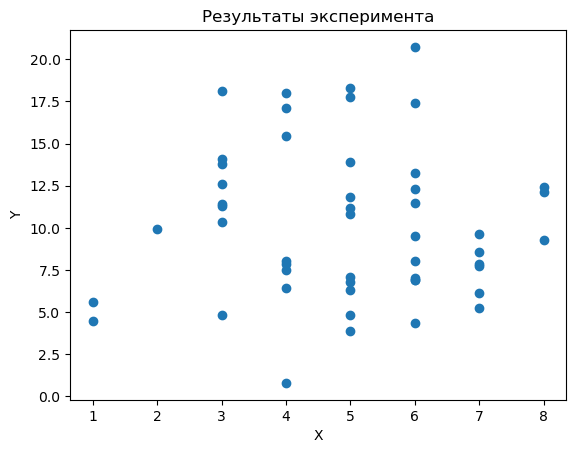

In [3]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \varepsilon$

Построение МНК оценок:

In [4]:
Y_matrix = np.matrix(Y).T
X_matrix = np.matrix([[1] * len(X), X])
print("Определитель матрицы X*X^T = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])

print(f"Оценки параметров:")
print('beta_0:' , beta_0)
print('beta_1:' , beta_1)


Определитель матрицы X*X^T =  7140.999999999996
Оценки параметров:
beta_0: 10.27955748494608
beta_1: -0.027197871446575872


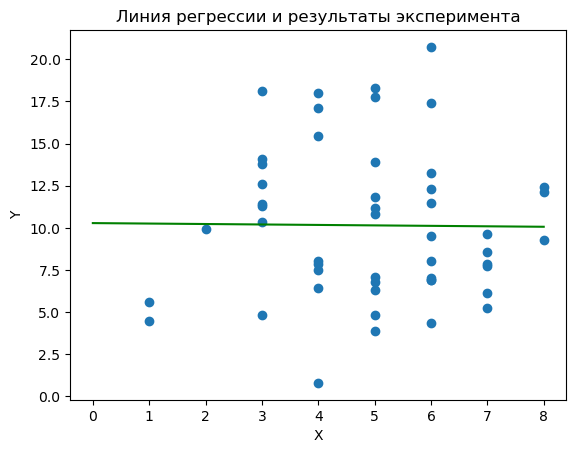

In [12]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot([0,8], [beta_0, beta_0 + beta_1 * 8], color = 'g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Линия регрессии и результаты эксперимента')
plt.show()

Визуально видно, что отклонение данных от линии регресии достаточно большое.

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

In [6]:
unbias_var = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", unbias_var)

Несмещённая оценка дисперсии = 20.823620845586518


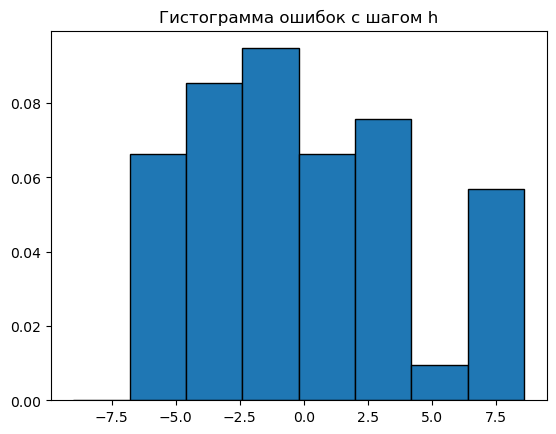

In [7]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.title("Гистограмма ошибок с шагом h")
plt.show()

Пусть данная выборка $X_1, X_2, \dots, X_n$ - выборка из распределения с функцией распределения $F$.



Основная гипотеза: $H_0 : F \equiv \mathcal{N}(0, S^2)$

Альтернативная гипотеза: $H_A : \exists x : F(x) \neq F_{\theta}(x)$

В качестве оценки неизвестного параметра $\theta$ возьмем: $\hat{\theta} = (0, S^2)$


$I_{1}=\left(- \infty;-4.4\right], n_{1}=8$


$p_{1}= 0.167$ $ np_{1}=8.373$

$I_{2}=\left( -4.4; -2.2 \right], n_{2}=12$

$p_{2}=0.147$  $np_{2}=7.369$

$I_{3}=\left( -2.2; 0\right], n_{3}=7$

$p_{3}=0.185$  $np_{3}=9.257$

$I_{4}=\left( 0; 2.2 \right], n_{4}=9$

$p_{4}=0.185$  $np_{4}=9.257$


$I_{5}=\left( 2.2; 4.4 \right], n_{5}=6$

$p_{5}=0.147$  $np_{5}=7.369$



$I_{6}=\left(4.4; + \infty\right), n_{6}=8$

$p_{6}=0.167$  $np_{6}=8.373$


Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{6}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =3.75$

$\mathcal{X}^{2}_{k-d-1,1-\alpha_{1}}=\mathcal{X}^{2}_{4,0.99}\simeq 13.3$


где k - число интервалов

 Так как $\mathcal{X}^{2}\lt \mathcal{X}^{2}_{4,0.99}$, то принимаем основную гипотезу

In [8]:
mean_mistakes = 0
std_mistakes = np.sqrt(unbias_var)
print("Статистика критерия Колмогорова Dn:", sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic)
print("x_alpha:", sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes))) # *


Статистика критерия Колмогорова Dn: 0.11859789049407599
x_alpha: 0.2301807385848777


$D_n \approx0.118$

$x_{\alpha} \approx 0.230$

Так как $D_n < x_{\alpha}$ , то гипотеза о нормальности принимается

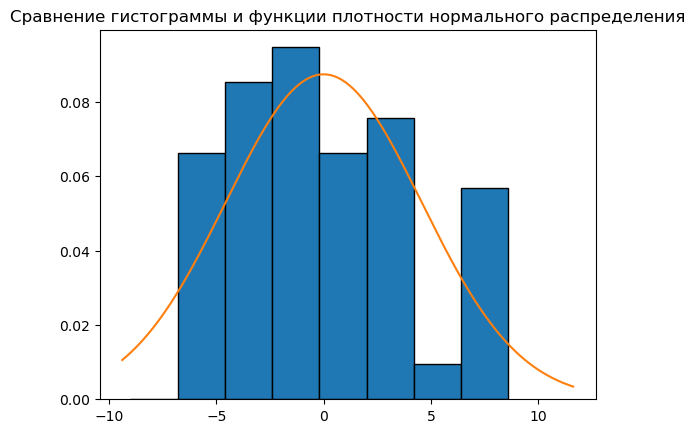

In [9]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), sps.norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Визуально видно, что в целом очертания нормальности присутсвуют, но однозначно сделать вывод о нормальности по визуальной оценке не представляется возможным.

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

Доверительный интервал для параметра $\beta_0$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_0$

Тогда $C = (1, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_0$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [10]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_0 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_0 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  2.6822040269502136
left =  4.932210754224471
right =  15.62690421566769


 Следовательно, доверительный интервал для параметра $\beta_0$
 
 $$\left[4.932, 15.627\right] \ni \beta_0$$

Доверительный интервал для параметра $\beta_1$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_1$

Тогда $C = (0, 1)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_1$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [11]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_1 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_1 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))



x_alpha =  2.6822040269502136
left =  -1.051375817100489
right =  0.9969800742073371


Следовательно, доверительный интервал для параметра $\beta_1$

$$\left[-1.051, 0.997\right] \ni \beta_1$$

Доверительный эллипс для параметра $(\beta_0, \beta_1)$:

ДНО-функция: $\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$

Тогда МНК оценка равна $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$

Найдем доверительный эллипс вида: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$



In [14]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
q = len(Beta_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = np.matrix([[1, 0], [0, 1]])
b_psi = C.T * np.linalg.inv(X_matrix * X_matrix.T) * C
#print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
#print("x_alpha = ", x_alpha)
x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
x_vec = np.matrix([[x_symbol], [y_symbol]])
expr = (x_vec - Beta_matrix).T * np.linalg.inv(b_psi) * (x_vec - Beta_matrix)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {q * unbias_var * x_alpha}")

cov = np.linalg.inv(b_psi) #полуоси
eigenvalues, _ = np.linalg.eig(cov)
semi_axes = np.sqrt(1 / eigenvalues * (x_alpha * q * unbias_var))
print(f'Доверительный эллипс имеет следующие полуоси : {semi_axes[0]} и {semi_axes[1]}')

Неравенство имеет вид: 50.0*x**2 + 494.0*x*y - 1014.52*x + 1363.0*y**2 - 5003.96*y + 5146.35979941184 <= 211.42904455854628
Доверительный эллипс имеет следующие полуоси : 6.456438688856946 и 0.3875181957477213


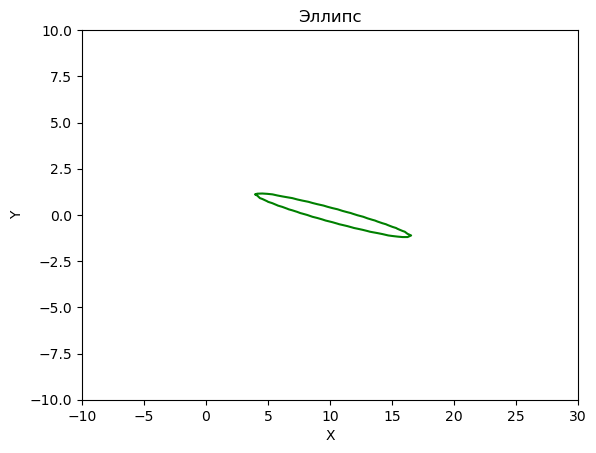

In [15]:
def plot_ellipse(a, b, c, d, f, g, boundary):
    x = np.linspace(-10, 30, 100) 
    y = np.linspace(-10, 10, 100)  
    X, Y = np.meshgrid(x, y)
    Z = a*X**2 + b*X*Y + c*X + d*Y**2 + f*Y + g  
    plt.contour(X, Y, Z, levels=[boundary], colors='g') 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Эллипс')
    plt.show()
    
plot_ellipse(50.0, 494.0, -1014.52, 1363.0, -5003.96, 5146.35979941184, 211.42904455854628)


### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

$RSS(\beta_H)=\sum_{i=1}^{n}(Y_i-\beta_0^H)^2\to min_{\beta_H}$

$\sum_{i=1}^{n}(Y_i-\beta_0^H)=0$

$\widehat{\beta_0^H}=\sum_{i=1}^{n}(Y_i)/n$

In [17]:
beta_0_h = sum(Y)/len(Y)
beta_1_h = 0
#print(f"Оценка вектора бета при выполнении основной гипотезы: ({beta_0_h}, {beta_1_h})")
Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h]])
F_statist = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/2/unbias_var
print(f"Статистика F = {F_statist}")
print(f"x_alpha = {sps.f.ppf(1 - alpha, 2,  n - r)}")

Статистика F = 0.0025367205019402148
x_alpha = 5.07666380708612


$\mathbb{F}_{статистика} \approx 0.0025$


Граница критической области $x_{\alpha} \approx  5.076$

Так как $\mathbb{F}_{статистика} < x_{\alpha}$ , то принимаем гипотезу 

### 5.  Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$

Построение МНК оценок параметров:

In [21]:
Y_matrix = np.matrix(Y).T
X_matrix = np.matrix([[1] * len(X), X, [x**2 for x in X]])
print("Определитель матрицы X*X^T = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix #МНК
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])
beta_2 = float(Beta_matrix[2])
print(f"Оценки параметров:")
print('beta_0:' , beta_0)
print('beta_1:' , beta_1)
print('beta_2:' , beta_2)

Определитель матрицы X*X^T =  4477127.999999936
Оценки параметров:
beta_0: 6.191884779707152
beta_1: 1.9613335647316725
beta_2: -0.2104061845004212


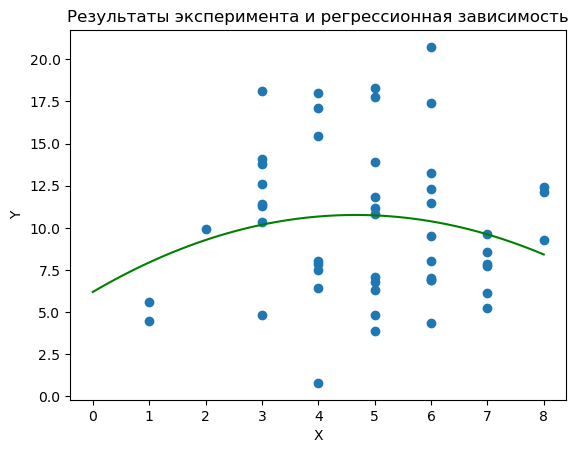

In [23]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
X_for_plot = [x / 10 for x in range(81)]
Y_for_plot = [beta_0 + beta_1 * x + beta_2 * x**2 for x in X_for_plot]
ax.plot(X_for_plot, Y_for_plot, color = 'g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента и регрессионная зависимость')
plt.show()

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [24]:
unbias_var = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", unbias_var)

Несмещённая оценка дисперсии = 20.676122599603843


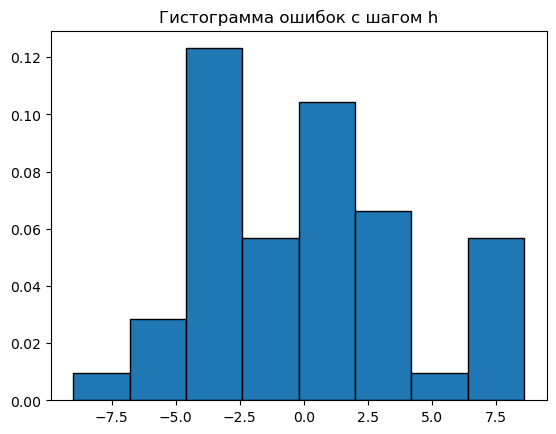

In [25]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.title("Гистограмма ошибок с шагом h")
plt.show()

Пусть данная выборка $X_1, X_2, \dots, X_n$ - выборка из распределения с функцией распределения $F$.

Основная гипотеза: $H_0 : F \equiv \mathcal{N}(0, S^2)$

Альтернативная гипотеза: $H_A : \exists x : F(x) \neq F_{\theta}(x)$

В качестве оценки неизвестного параметра $\theta$ возьмем: $\hat{\theta} = (0, S^2)$



$I_{1}=\left(- \infty;-4.4\right], n_{1}=6$


$p_{1}= 0.166$ $ np_{1}=8.330$

$I_{2}=\left( -4.4; -2.2 \right], n_{2}=14$

$p_{2}=0.148$  $np_{2}=7.382$

$I_{3}=\left( -2.2; 0\right], n_{3}=4$

$p_{3}=0.186$  $np_{3}=9.287$

$I_{4}=\left( 0; 2.2 \right], n_{4}=11$

$p_{4}=0.186$  $np_{4}=9.287$


$I_{5}=\left( 2.2; 4.4 \right], n_{5}=7$

$p_{5}=0.148$  $np_{5}=7.382$


$I_{6}=\left(4.4; + \infty\right), n_{6}=8$

$p_{6}=0.166$  $np_{6}=8.330$


Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{6}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =9.94$

$\mathcal{X}^{2}_{k-d-1,1-\alpha_{1}}=\mathcal{X}^{2}_{4,0.99}\simeq 13.3$

где k - число интервалов

 Так как $\mathcal{X}^{2}\lt \mathcal{X}^{2}_{4,0.99}$, то принимаем основную гипотезу

In [29]:
mean_mistakes = 0
std_mistakes = np.sqrt(unbias_var)
print("Статистика критерия Колмогорова Dn:", sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic)
print("x_alpha:", sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes)))

Статистика критерия Колмогорова Dn: 0.09680458294847605
x_alpha: 0.2301807385848777


$D_n \approx 0.097$

$x_{\alpha} \approx 0.230$

Так как $D_n < x_{\alpha}$ , то  гипотеза о нормальности принимается

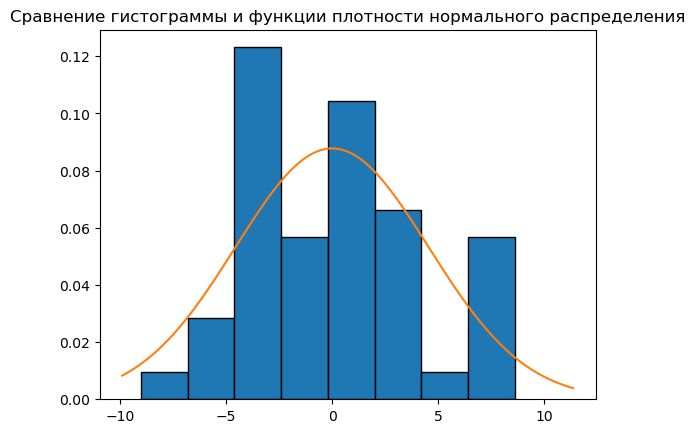

In [30]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), sps.norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Визуально видно нормальность ошибок, однако в некоторых местах заметны отклонения от нормального распределения

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

Доверительный интервал для параметра $\beta_0$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_0$

Тогда $C = (1, 0, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_0$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [33]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_0 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_0 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  2.6845556178665215
left =  -4.677555603903217
right =  17.06132516331752


$$\left[-4.677,  17.061\right] \ni \beta_0$$

Доверительный интервал для параметра $\beta_1$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_1$

Тогда $C = (0, 1, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_1$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [35]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_1 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_1 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  2.6845556178665215
left =  -2.7579818099896487
right =  6.680648939452994


$$\left[ -2.757, 6.680\right] \ni \beta_1$$

Доверительный интервал для параметра $\beta_2$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_2$

Тогда $C = (0, 0, 1)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_2$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [40]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_2 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_2 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  2.6845556178665215
left =  -0.6979197629667653
right =  0.27710739396592293


$$\left[-0.697, 0.277\right] \ni \beta_2$$

Доверительный эллипсоид для параметра $(\beta_0, \beta_1, \beta_2)$:

ДНО-функция: $\psi = C^\intercal \beta = (\beta_0, \beta_1, \beta_2)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 & 0\\0 & 1 &0 \\ 0&0&1 \end{pmatrix}$

Тогда МНК оценка равна $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1,\hat{\beta}_2)^\intercal$

Найдем доверительный эллипсоид вида: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [47]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
q = len(Beta_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b_psi = C.T * np.linalg.inv(X_matrix * X_matrix.T) * C
print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
print("x_alpha = ", x_alpha)

x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
z_symbol = sympy.Symbol('z', real=True)
x_vec = np.matrix([[x_symbol], [y_symbol], [z_symbol]])
expr = (x_vec - Beta_matrix).T * np.linalg.inv(b_psi) * (x_vec - Beta_matrix)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {q * unbias_var * x_alpha}")
expr = expr[0,0].as_poly().as_expr() - q * unbias_var * x_alpha
print(f"Перенесем все в левую часть: {expr} <= 0")
x_2_symbol = sympy.Symbol("x'", real=True)
y_2_symbol = sympy.Symbol("y'", real=True)
z_2_symbol = sympy.Symbol("z'", real=True)
ev, _ = np.linalg.eig(np.linalg.inv(b_psi))
koef = ev / (x_alpha * q * unbias_var)
expr = koef[0]*x_2_symbol**2+koef[1]*y_2_symbol**2+koef[2]*z_2_symbol**2
print(f"Итоговый вид неравенства: {expr} <= 1")
print(f"Длины полуосей: {np.sqrt(1/koef[0])}, {np.sqrt(1/koef[1])} , {np.sqrt(1/koef[2])}")

Определитель матрицы b_psi =  2.2335747380910506e-07
x_alpha =  4.227900552121905
Неравенство имеет вид: 50.0000000000002*x**2 + 494.000000000003*x*y + 2726.00000000002*x*z - 1014.52000000002*x + 1363.00000000001*y**2 + 16166.0000000001*y*z - 5003.9600000001*y + 50539.0000000004*z**2 - 27318.5600000006*z + 5174.11583781878 <= 262.2497704638158
Перенесем все в левую часть: 50.0000000000002*x**2 + 494.000000000003*x*y + 2726.00000000002*x*z - 1014.52000000002*x + 1363.00000000001*y**2 + 16166.0000000001*y*z - 5003.9600000001*y + 50539.0000000004*z**2 - 27318.5600000006*z + 4911.86606735496 <= 0
Итоговый вид неравенства: 197.79055574853*x'**2 + 0.00409369348847835*y'**2 + 0.306572565222446*z'**2 <= 1
Длины полуосей: 0.07110452255764989, 15.629401180456616 , 1.806064915346118



**Уравнение доверительного эллипсоида:**

$$ \frac{x^2}{0.0711^2} + \frac{y^2}{15.629^2} + \frac{z^2}{ 1.806^2} = 1$$

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.


Основная гипотеза: $H_0 : \psi = 0$

$\mathbb{F}_{статистика}$: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$,

где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы

$SS_e=RSS(\hat{\beta})$


In [57]:
X_matrix_h = np.matrix([[1] * len(X), X])
Beta_h_matrix = np.linalg.inv(X_matrix_h * X_matrix_h.T) * X_matrix_h * Y_matrix
beta_0_h = float(Beta_h_matrix[0])
beta_1_h = float(Beta_h_matrix[1])
beta_2_h = 0
Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h], [beta_2_h]])
#print(f"Оценка вектора бета при выполнении основной гипотезы: ({beta_0_h}, {beta_1_h}, {beta_2_h})")
F_statist = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/q/unbias_var
print(f"F_статистика = {F_statist}")
print(f"x_alpha = {sps.f.ppf(1 - alpha, q, n - r)}")

F_статистика = 0.44747329958445403
x_alpha = 4.227900552121905


$\mathbb{F}_{статистика} \approx 0.447$

Граница критической области $x_{\alpha} \approx 4.228$

Так как $\mathbb{F}_{статистика} < x_{\alpha}$ , то принимаем гипотезу 

## Выводы
В ходе выполнения практической работы был проведен регрессионный анализ. 
Были изучены основные положения метода наименьших квадратов (МНК), статистические свойства МНК-оценок,  понятие функции регрессии и роль МНК в регрессионном анализе.
Были сформулированы линейные регрессионные модели, построены несмещённые оценки дисперсии, построены МНК оценки параметров,произведено исследование нормальности ошибок,построены доверительные интервалы, доверительный эллипс, написано уравнение доверительного эллипсоида, проверены гипотезы о независимости и линейной регрессионной зависимости. 